# Data Mining / Prospecção de Dados

## Sara C. Madeira and André Falcão, 2019/20

# Project 2 - Clustering

## Dataset and Tools

The dataset to be analysed is **`AML_ALL_PATIENTS_GENES_EXTENDED.csv`**. This is an extended version of the widely studied **Leukemia dataset**, originally published by Golub et al. (1999) ["Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene
Expression Monitoring"](http://archive.broadinstitute.org/mpr/publications/projects/Leukemia/Golub_et_al_1999.pdf.) 

**This dataset studies patients with leukaemia. At disease onset clinicials diagnosed them in two different types of leukaemia: acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).** Some of these diagnoses were later confirmed, other revealed to be wrong. The data analyzed here contains the expression levels of 5147 Human genes (features/columns) analyzed in 110 patients (rows): 70 ALL and 40 AML.
Each row identifies a patient: The first column, `ID`, contains the patients' IDs , the second column, `DIAGNOSIS`, contains the initial diagnosis as performed by clinicians (ground truth), and the remaining 5147 columns contain the expression levels of the 5147 genes analysed.

**The goal is to cluster patients and (ideally) find AML groups and ALL groups.**


<img src="AML_ALL_PATIENTS_GENES_EXTENDED.jpg" alt="AML_ALL_PATIENTS_GENES_EXTENDED.csv" style="width: 1000px;"/>

## 1. Load and Preprocess Dataset

At the end of this step you should have:
* a 110 rows × 5147 columns matrix, **X**, containing the values of the 5147 features for each of the 110 patients.
* a vector, **y**, with the 110 diagnosis, which you can use later to evaluate clustering quality.

In [2]:
# Imports libraries
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
from imblearn.combine import SMOTETomek

# Import local modules

from functions import *

#IPython Configs

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Get data_path
path = get_path()

C:\Users\peped\Miniconda3\envs\AA\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Path to Data: C:\Users\peped\Documents\Repo\PD_2_Clustering\dataset


In [3]:
# Load Data
df = pd.read_csv(os.path.join(path,"AML_ALL_PATIENTS_GENES_EXTENDED.csv"))
df.head()

,ID,DIAGNOSIS,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,1,ALL,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,...,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,2,ALL,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,...,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,3,ALL,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,...,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,4,ALL,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,...,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,5,ALL,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,...,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


In [4]:
# Preprocess Data
try:
    df, X, y = validate_format(df, rows=110, columns=5147, target='DIAGNOSIS', drop=['ID'], col_print=5)
except TypeError:
    pass

df.head()

Valid Format

First 5 Columns: ['AFFX-BioC-5_at', 'hum_alu_at', 'AFFX-DapX-M_at', 'AFFX-LysX-5_at', 'AFFX-HUMISGF3A/M97935_MA_at']

Targets: {'AML', 'ALL'}


,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,target
0,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,2.489963,1.794520,...,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117,ALL
1,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,-0.408754,-0.002931,...,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146,ALL
2,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,0.542223,0.548277,...,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337,ALL
3,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,0.247321,0.266520,...,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082,ALL
4,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,0.379259,-0.311094,...,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542,ALL


#### Target Distribution

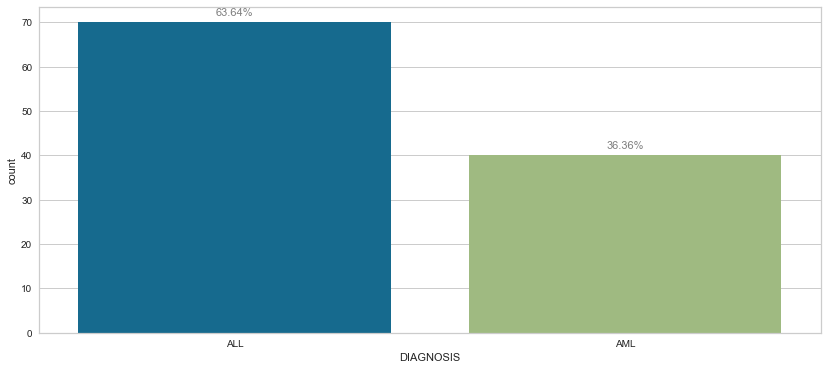

In [5]:
# Plot Target Again

make_bar_chart(y)

There is a considerable difference between the binary classes. 

To solve this issue, a mixture of under sampling and over sampling:
1. `SMOTE` Function 
2. `Tomek Links` Function

The `SMOTE` function will generate new data points in the minority category, based on points that already existed in the dataset. Subsequently through the `Tomek Links` technique, the data is cleaned by removing near neighbors from different classes. This way, allowing models to discriminate classes better, since ambigous datapoints are removed.

Dataset has now 140(+30) datapoints.


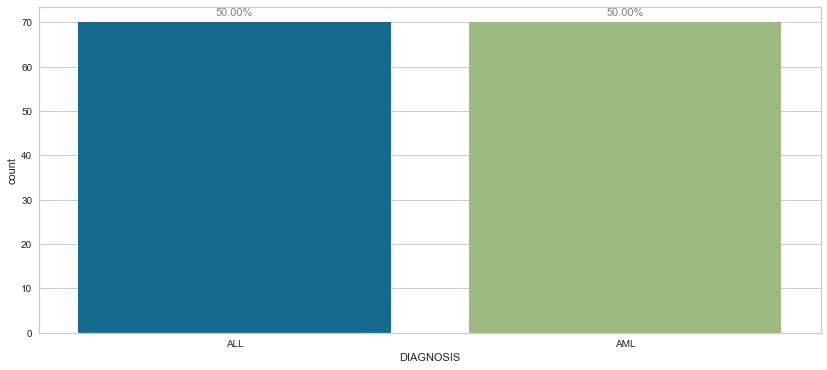

In [6]:
#Aplly under and over sampling
smt = SMOTETomek()
X, y = smt.fit_sample(X, y)

# Plot Target Again

make_bar_chart(y)
print('Dataset has now {}(+{}) datapoints.'.format(len(X), len(X) - len(df)))

The target is now balanced.

## 2. Dimensionality Reduction

#### Remove Features with low variance

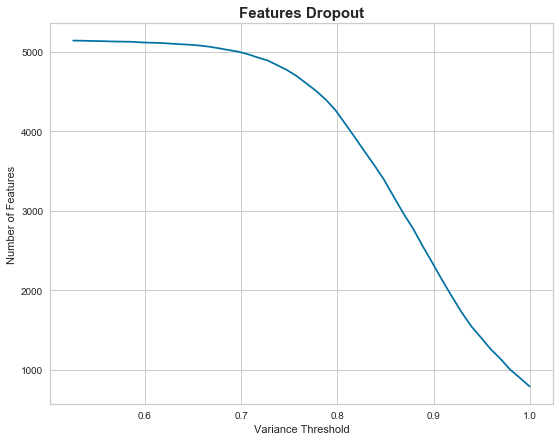

In [7]:
_, _ = detect_threshold(X, 100)

After this analysis, its clear that to retain only, the most useful features, we must choose a threshold between 0,9 and 1.

In [9]:
X_variance = variance_threshold(X, 0.99)

895 Features Kept of 5147


#### Principal Component Analysis

To do a PCA, one must decide a metric to determine the components to retain. 

In a normal situation i would use a Maximum Likelihood Approach, based on the following papers:

* Bishop, Christopher M. "Bayesian pca." Advances in neural information processing systems. 1999.
* Minka, Thomas P. "Automatic choice of dimensionality for PCA." Advances in neural information processing systems. 2001.

But since this dataset has more features that datapoints, the assumption on which this methodology is built do not hold.

In this case I'll use the explained variance to access how many components should be kept.

Evaluation loss:  0.1878  (MSE)
Components Kept explain 80.0% of the dataset's variance
32 Components Kept from 5147 features


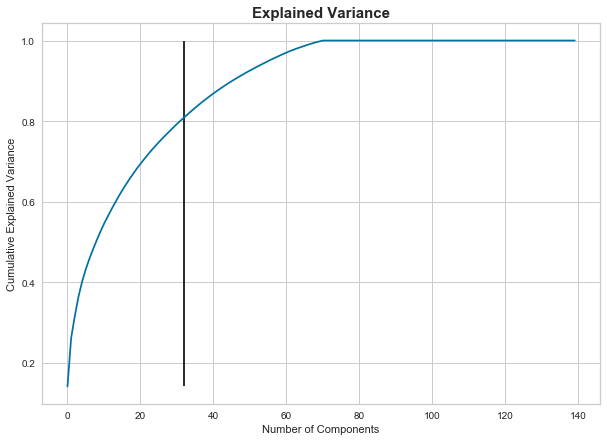

In [10]:
X_pca = ca_threshold(X, analisys='pca')

In this case I consider 80% of explained variance to be a good enough, given the ratio between explained_varience and number_of_components. Keeping 34 components of a total of 5147 features.

In this case I consider 80% of explained variance to be a good enough, given the ratio between explained_varience and number_of_components. Keeping 34 components of a total of 5147 features.

In some cases, looking at the eigenvalues might also be useful, to determine this threshold. Normally the rule is to use all components with eigenvalues higher than one. This technique is simple, but prone to error. In more standard datasets it might work ok, but in this case, it would probably point to 5 or 6 components, that account for 20 or 30 % of variance. This implicates the loss of 70 % of the dataset’s variance! 

So, when MLE is not possible, I prefer to always extract the explained variance, and make my decision based on it, since it gives me a better perception of what is actually happening to the dataset. Looking at the eigenvalues might be usefull but it requires, a closer look at the model.

#### Kernel PCA

The main problem when using a simple PCA, is that the components are using linear correlations, so eventual non-linear relationships that might exist are not consider. To solve this problem, a simple solution is to use the Kernel trick. We project our data into an implicit feature space of even higher dimensionality, where non-linear relationships, are linearly separable. This is because in a dataset with d dimensions and n points, when n >= d, points are almost always linearly separable.

In this problem in particular this technique is not very useful, since this condition already applies without using an implicit feature space.

#### Linear discriminant analysis

Another type of component analysis when the target is known is LDA. This technique specializes in finding linear combinations (components) that separate well the target classes, this not only facilitates learning by reducing dimensionality but also does it in a way that creates feature that are able to be linearly separated.

LDA can be used in binary targets for other analysis, but has it generates a maximum N components *, where N equals C (classes) minus 1, is not very useful since it will only generate one component, as it is visible bellow. To better explore this technique, as a dimensionality reduction technique, a multi class target is required.

*n_components = min(n_classes - 1, n_features)

In [11]:
X_lda = ca_threshold(X, y, analisys='lda')

Components Kept explain 80.0% of the dataset's variance
1 Components Kept from 5147 features


#### Autoencoder

Autoencoders are an alternative way of performing dimensionality reduction, by generating representations of the dataset. 

In a simple way autoencoders compress data (encode), generating N data representations (features), and them decompress data (decode) to reconstruct the dataset. This can be useful to many tasks like removing noise from data. After training these representations can be used as a reduced set of features, since they can generate an almost perfect version of the dataset.

They have a clear advantage to component analysis since any N representations can be generated without affecting the quality of the reconstruct dataset, a smaller N only implicates more training time. Also, autoencoders thrive with big datasets, while pca fails when applied to big data.

To learn more about autoencoders, please refer to this blog provided by [keras](https://blog.keras.io/building-autoencoders-in-keras.html).

In this case since a big feature reduction is required, and the dataset is low on datapoints, the number of epochs will need to be very high to ensure convergence, this will impact training time. So, I will pre-train the network, by running my function in training mode, and saving the model and weights. In other runs the function can be called with the training mode off, and it will use the pre-trained models.

In [12]:
# To train the NN
#X_encoded = generate_representation(X, train=True, encoding_dim=10, epochs=10000)

# Load Model from saved files
X_encoded = generate_representation(X, train=False)

Evaluation loss:  0.7257  (MSE)
10 Representations Generated from 5147 Features


Given that the loss is very low, it is plausible to conclude that our network was able to generate good representations of the dataset.

By looking at the result of the pca, one could fall in the error of thinking that those results are better, and that technique is not worth the trouble. It's important to remark that although, the results for the pca where very good, that difference in the loss for both techniques does not hold significance, and that using autoencoders we can (almost) get any number of representations we want without damaging our loss in a significant manner. In this case, by using an autoencoder we can reconstruct our dataset using 3 times less features.

The Autoencoder also provides better dimensionality reduction for large datasets. The pca with a big dataset would simply not run, but the autoencoder would perform even better if more datapoints where provided.

The autoencoder could even improve performance if I add spent more time tuning it, note that I am using the simplest network possible, but other more complex networks could get better results. Performance could also be improved by training the model with more epochs, implicating more computing time.

## 3. Defining Metrics

**Unsupervised** :
* Metrics [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), this score is the most common when no previous knowledge of the ground truth is available.

**Supervised** :
* Confusion Matrix, this typical representation for supervised learning ff some insights into how the clusters are behaving.
* Metrics [Fowlkes Mallows](https://scikit-learn.org/stable/modules/clustering.html#fowlkes-mallows-scores), this is arguably the best metric for measuring cluster quality, when the ground truth is available, without any drawback expect the fact that it needs that knowledge to work. (Normally not available)

**Visualizations** :

* [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html#silhouette-visualizer), this method offers a visualization for the Silhouette score for every cluster in a given model.
* [Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html), this method offers a way to represent the impact of using a given K number of clusters, by iteratively fitting a model with different K values and them plotting the Silhouette Score, or another scoring metric. (Normaly the metric used will be distortion, since it provides better visual inference)

## 4. Partitional Clustering : X-Means

"X-means clustering method starts with the assumption of having a minimum number of clusters, and then dynamically increases them. X-means uses specified splitting criterion to control the process of splitting clusters."

In this case the spliting criterion will be the BIC (Bayesian Information Criterion). 

Instead of generating random inicial cluester centers, they will be generated based on an approximation ratio.

#### 4.1 Dataset: X

##### Finding Optimal K number of clusters

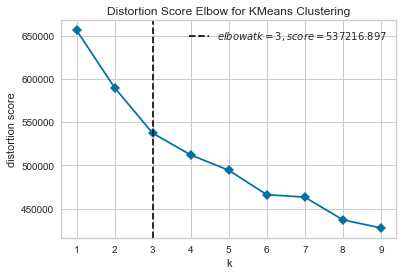

In [18]:
# Plot Elbow Method
get_k(X, _range=(1,10))

Give the high dimensionality, the silhoutte score cannot determin with precison k. 

The ideal number of clusters determined is 3. So we expect the X-Means to generate between 2-4 clusters.

##### Clustering

2 Clusters Generated
Total WCE: 590764.99


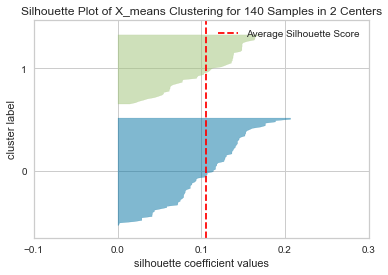

Unsupervised Metrics: 

Silhouette Score: 0.105 (between [-1,1])


Supervised Metrics:

Fowlkes Mallows Score: 0.675 (between [0,1])
Confusion Matrix: 
    ALL  AML
0   63   22
1    7   48


In [37]:
clustering(X, y, Xmeans={'amount_centers':2})

The algorithm only used the inicial centers, not generating more clusters. The result is very bad, which is normal given that we are using an unparsed dataset.

At this point there is not much to say, I don't expect to obtain acceptable results using an original version of the dataset.

#### 4.2 Dataset: X_encoded

##### Finding Optimal K number of clusters

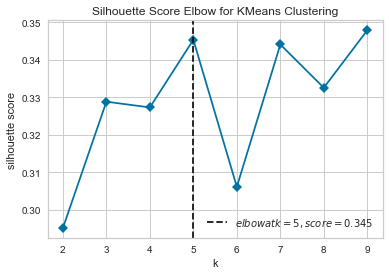

In [47]:
# Plot Elbow Method
get_k(X_encoded, _range=(2,10), metric='silhouette')

(Here I decided to use the silhouette metric since we have a smaller number of features, this metric might be more accurate)

Once again this method is not very clear, but the aceptable of clusters determined is near 5.

Since its not clear and the X means algorithm uses a different metric, to determine the number of clusters is possible that the cluster number variates a bit.

##### Clustering

4 Clusters Generated
Total WCE: 501352.04


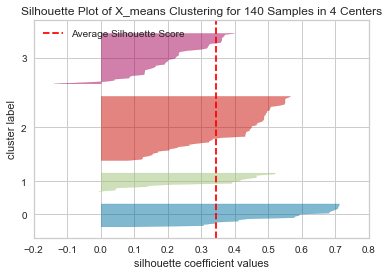

Unsupervised Metrics: 

Silhouette Score: 0.34299999475479126 (between [-1,1])


Supervised Metrics:

Fowlkes Mallows Score: 0.562 (between [0,1])
Confusion Matrix: 
    ALL  AML
0   20    1
1   14    3
2   36   21
3    0   45


In [75]:
clustering(X_encoded, y, Xmeans={'amount_centers':2})

The performance increases considerably when using representations, what comes to prove the reduction capabilities of this networks.

Obviously, the increase in performance, is mostly seen in the unsupervised metrics since we are generating 4 clusters and have only 2 classes in the target.

By analyzing the silhouette, and given the number of clusters, I can access that this dataset is very sparse. The dataset has only 2 classes, but data tends to fall into 3 to 6 clusters, with 1 or 2 clusters holding must of the datapoints. Which leads me to conclude that we have two, real, datacenters, that represent the classes in our target, and them various groups of outliers, that can extend up to 8 clusters. The extension can be accessed by looking at the elbow graph. This leads me to the affirmation of the sparseness of the dataset.

#### 4.3 Dataset: X_variance

##### Finding Optimal K number of clusters

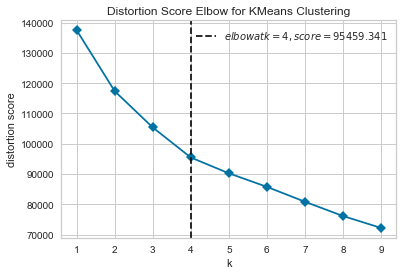

In [145]:
# Plot Elbow Method
get_k(X_variance, _range=(1,10), metric='distortion')

The metric is not clear (this is why using X-means is a major advantage, because it solves ambigous results).

##### Clustering

2 Clusters Generated
Total WCE: 117355.0


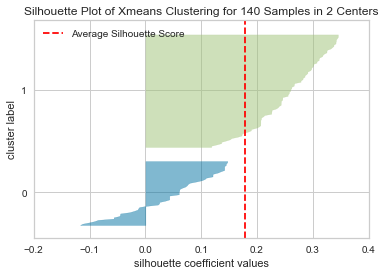


Unsupervised Metrics: 

Silhouette Score: 0.178 (between [-1,1])


Supervised Metrics:

Fowlkes Mallows Score: 0.751 (between [0,1])
Confusion Matrix: 
    AML  ALL
0   50    1
1   20   69


In [150]:
clustering(X_variance, y, Xmeans={'amount_centers':2})

This reduction technique was also able to provide a good representation of the dataset.

Although the cluster quality as decreased, clusters represent well the original classes.

This tecnique was able to reduce noise better then autoencoders, allowing to generate a better representation of the targets classes.

#### 4.4 Dataset: X_pca

##### Finding Optimal K number of clusters

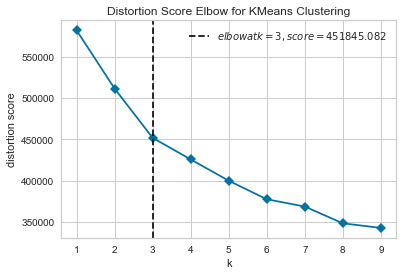

In [77]:
# Plot Elbow Method
get_k(X_pca, _range=(1,10), metric='distortion')

##### Clustering

2 Clusters Generated
Total WCE: 512429.36


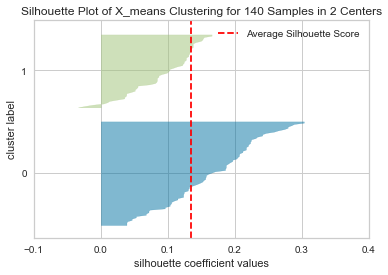

Unsupervised Metrics: 

Silhouette Score: 0.134 (between [-1,1])


Supervised Metrics:

Fowlkes Mallows Score: 0.663 (between [0,1])
Confusion Matrix: 
    ALL  AML
0   61   21
1    9   49


In [84]:
clustering(X_pca, y, Xmeans={'amount_centers':2})

I access that the pca technique, was also capable of removing noise associated with classes. This is probably do to the fact that it creates linear combinations of data, but then only maintains the most important ones, while autoencoders maintain all representations generated.

#### 4.5 Conclusions

In general, partitional clustering is not able to generate clusters that represent the dataset, quality is poor for both supervised and unsupervised learning problems.

Dimensionality reduction it is clearly a very important process in the pipeline, improving greatly the performance of the model. Pca, and removing features with low varieance provide a good way of removing the datasets noise, while autoencoders retain better the original dataset, allowing clusters with more quality to be generated, although they don't represent the target so well, due to data sparseness.

Normally two main clusters are found that represent the main classes, and others represent outliers. Partitional clustering, seems to be mostly generating clusters that resemble with the supervised problem, which might be specific to this algorithm, or have some insight into the patterns of the dataset. By testing other algorithms, a better inference can be made.

## 5. Hierarchical Clustering : BIRCH

The Birch algorithm is a form of optimized hierarchical clustering. BIRCH stands for Balanced Iterative Reducing and Clustering using Hierarchies, and that is exactly what it does. This algorithm attempts to tackle big data constrains by summarizing information, to this end it starts by generating a clustering feature Tree, or CF-Tree. A CF-Tree is a compact representation of the dataset, that follows a tree-like structure. The clustering process then happens using only the CF-Tree, by reducing the tree. In the last step the algorithm reads the original dataset again to correct possible inaccuracies, in total only 2 full reads of the dataset are needed, which is vary advantageous in terms of IO. 

On top of Birch other algorithms might still be applied by considering CF-Tree leaf’s as new samples, this way allowing to reduce the number of clusters to a certain desired K. To do this, in this case, `SKlearn` implements the `Agglomerative Clustering` algorithm on top of the CF-Tree.

Since in the last part, I clearly verified the advantage of dimensionality reduction, from now on I will discard the original dataset, and won't consider it in further analysis.

To find the optimal value of K, the elbow method will be used once more.

#### 5.1 Dataset: X_Varience

##### Select Optimal K number of clusters

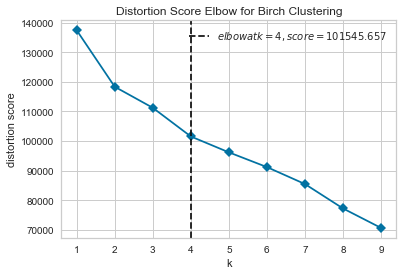

In [153]:
get_k(X_variance, model_str='Birch', _range=(1,10), metric='distortion')

##### Clustering

4 Clusters Generated


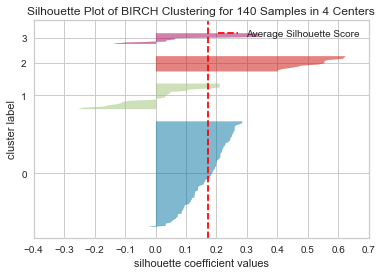


Unsupervised Metrics: 

Silhouette Score: 0.173 (between [-1,1])


Supervised Metrics:

Fowlkes Mallows Score: 0.644 (between [0,1])
Confusion Matrix: 
    AML  ALL
0   23   70
1   23    0
2   14    0
3   10    0


In [155]:
clustering(X_variance, y, BIRCH={'number_clusters':4})

#### 5.2 Dataset: X_Encoded

##### Select Optimal K number of clusters

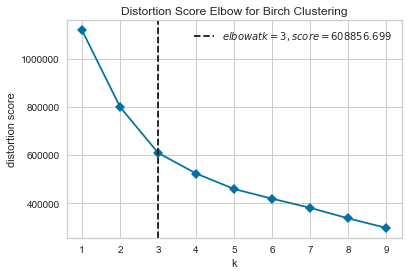

In [157]:
get_k(X_encoded, model_str='Birch', _range=(1,10), metric='distortion')

##### Clustering

3 Clusters Generated


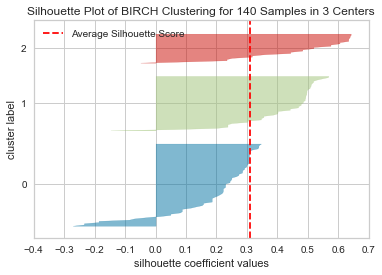


Unsupervised Metrics: 

Silhouette Score: 0.3109999895095825 (between [-1,1])


Supervised Metrics:

Fowlkes Mallows Score: 0.578 (between [0,1])
Confusion Matrix: 
    AML  ALL
0   55   14
1   13   33
2    2   23


In [160]:
clustering(X_encoded, y, BIRCH={'number_clusters':3})

#### 5.3 Dataset: X_PCA

##### Select Optimal K number of clusters

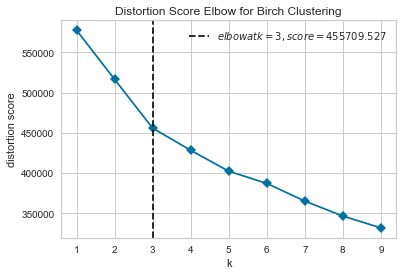

In [158]:
get_k(X_pca, model_str='Birch', _range=(1,10), metric='distortion')

##### Clustering

3 Clusters Generated


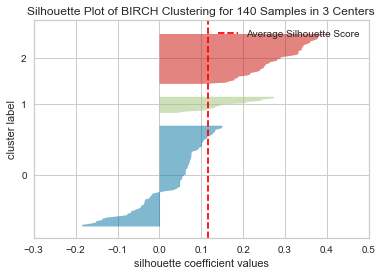


Unsupervised Metrics: 

Silhouette Score: 0.117 (between [-1,1])


Supervised Metrics:

Fowlkes Mallows Score: 0.546 (between [0,1])
Confusion Matrix: 
    AML  ALL
0   57   27
1    1   13
2   12   30


In [161]:
clustering(X_pca, y, BIRCH={'number_clusters':3})

#### 5.4 Conclusions

Results are very similar to the previous algorithm, with a worst performance from the dataset that used PCA. The autoencoder seems to provide overall better-quality clusters, while not being able to represent the target that well. This might be due to data sparseness, or lack of data points to better train the encoder.

In regards to the labeled learning problem clearly removing feature with low variance is getting a better performance, because it is able to eliminate more noise, although as I said a better trained maybe a little bit more complex autoencoder would probably get even better results.

## 6. Density-based Clustering : DBSCAN

DBSCAN is a density-based algorithm so I don't expect it to perform very good given data sparseness, to prove this point I will analyse the algorithm using my best representation of the dataset, X_encoded.

3 Clusters Generated


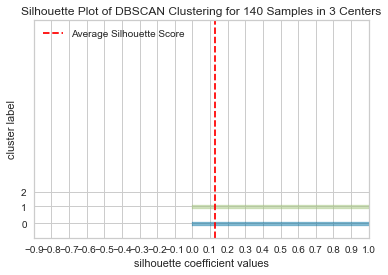


Unsupervised Metrics: 

Silhouette Score: 0.12700000405311584 (between [-1,1])


Supervised Metrics:

Fowlkes Mallows Score: 0.668 (between [0,1])
Confusion Matrix: 
    AML  ALL
0    4    0
1   66   70


In [166]:
clustering(X_encoded, y, DBSCAN={'eps':1.0,'neighbors':4})

Clearly the algorithm is not able to find feasible clusters

## 6. Conclusions

**Focus Points:**
* The focus of this work was to explore the maximum number of methodologies and determine which performed best under extreme conditions of high dimensionality. And so, I decided not to spend too much time hyperparameter tuning (in some cases as it might have improved results). 
* Even more algorithms could have been applied mixture models, genetic algorithms, Biclustering, CLIQUE. But some bugs that I could not solve in time, limited the interaction between sklearn metrics and pyclustering models.
* The datasets small size and high dimensionality, combined with data sparseness, made the clustering problem very difficult, and the results obtained were not promising.
* Autoencoders proof to be a very good method for dealing with high dimensionality. Although with a bigger dataset, and a better architecture it could obtained even better results.
* Both partitional and hierarchical clustering, obtain similar results, while density-based clustering is not very efficient to deal with this dataset.
* CLIQUE algorithm, had it worked, would have been the best one to deal with this problem, since subspace clustering was created with high dimensionality in mind.

With more time Biclustering and the CLIQUE algorithm could had been implemented and would have proved to be very useful for a better analysis of the dataset. SKlearn has an implementation of Biclustering but it is of poor quality, I have found better implementation, but did not have the time to adapt the rest of the pipeline to allow those libraries.

I decided to focus mainly on exploring dimensionality reduction tools and optimizing the basic clustering algorithms we used in the practical classes, since the dataset did not show much promise. This way I was able to explore these tools under extreme conditions and determine that, autoencoders are very useful to solve this type of problems, even in these conditions. The dataset was of low quality and so even with these tools not much information was obtained. The data was very sparse, and there were too few datapoints for the enormous number of features.

Regarding documentation of the developed functions, I tried to document the most I could, but some functions have just a basic description. But I think the code is readable so it more information might not be needed.

I think the focus probably made my work a little bit different of what was originally proposed, but I think in a positive way, and that it offers a different perspective to this project.